In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dask.array as da
import datetime 
import gc
from multiprocessing import pool
import cPickle as pickle
import os
import feather

In [3]:
salesdata = feather.read_dataframe("../input/tmp_R_sales_with_buyers.feather")

In [12]:
salesdata['documenttypeid'][salesdata.inclusionruleidzestimate>0].value_counts()

138.0    1589669
66.0      598343
54.0      393627
128.0      57921
27.0       29819
86.0       14982
153.0       3209
97.0        2333
109.0       2104
71.0        1522
28.0        1091
34.0           6
Name: documenttypeid, dtype: int64

In [11]:
for u in sorted(salesdata['documenttypeid'][salesdata.inclusionruleidzestimate>0].value_counts().index.astype(np.int)):
    print u

27
28
34
54
66
71
86
97
109
128
138
153


In [13]:
salesdata['documenttypeid'].value_counts()

138.0    2351426
72.0     1979322
66.0      878488
54.0      736879
128.0     325981
119.0     295656
104.0     294539
133.0     293218
129.0     211622
5.0       153115
86.0      142602
26.0       58445
63.0       56799
33.0       53054
48.0       48642
49.0       41136
27.0       39683
131.0      36066
60.0       26622
109.0      21678
80.0       21571
97.0       16419
46.0       15118
65.0       14894
50.0       10337
55.0        9149
76.0        8576
1.0         5788
6.0         5489
36.0        5396
          ...   
79.0         111
4.0           73
10.0          69
57.0          59
102.0         46
70.0          41
149.0         35
23.0          22
38.0          20
12.0          17
34.0          15
35.0          10
22.0          10
117.0         10
112.0          8
113.0          5
132.0          5
124.0          4
114.0          4
25.0           4
8.0            3
9.0            3
41.0           3
69.0           3
15.0           2
78.0           2
77.0           2
107.0         

In [10]:
for u in sorted(salesdata['documenttypeid'].value_counts().index.astype(np.int)):
    print u

1
3
4
5
6
8
9
10
11
12
13
15
19
21
22
23
25
26
27
28
33
34
35
36
37
38
41
46
48
49
50
51
52
53
54
55
57
59
60
62
63
64
65
66
67
69
70
71
72
76
77
78
79
80
81
82
86
97
101
102
104
105
106
107
108
109
112
113
114
117
119
124
126
128
129
131
132
133
134
136
137
138
140
149
153


In [17]:
salesdata['dataclasstypeid'].value_counts()/len(salesdata)

2.0    0.639995
5.0    0.360005
Name: dataclasstypeid, dtype: float64

In [18]:
salesdata['dataclasstypeid'][salesdata['inclusionruleidzestimate']>0].value_counts()/len(salesdata)

5.0    0.212003
2.0    0.117117
Name: dataclasstypeid, dtype: float64

In [20]:
salesdata['partialinteresttransfertypeid'].value_counts()

5.0    908
2.0     95
1.0     48
4.0     20
3.0      4
Name: partialinteresttransfertypeid, dtype: int64

In [22]:
salesdata['partialinteresttransfertypeid'][salesdata['inclusionruleidzestimate']>0].value_counts() 

4.0    6
Name: partialinteresttransfertypeid, dtype: int64

In [ ]:
a=reduce(lambda u,v: u+v, salesdata['buyertype'].map(lambda u: u.split(',')).values)
a=pd.Series(list(set(a))

In [ ]:
a=pd.Series(list(set(a))

In [4]:
taxdata=feather.read_dataframe("../input/tmp_R_sales.feather",
                               columns=['assessmentyear','parcelid','totalassessedvalue','totalmarketvalue',
                                       'taxvaluedollarcnt','taxamount'])

In [5]:
newdata=pd.merge(salesdata,taxdata, how='left', left_on=['parcelid','transactionyear'], right_on=['parcelid','assessmentyear'])

In [6]:
newdata.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8187370 entries, 0 to 8187369
Columns: 31 entries, regionidcounty to totalmarketvalue
dtypes: datetime64[ns](2), float32(17), float64(1), int32(4), int8(2), object(5)
memory usage: 1.2+ GB


In [7]:
newdata.head()

regionidcounty  transactionyear recordingdate  parcelid  legalrecordingid  \
0            3227             2017    2017-06-30  16726084         575791397   
1            3227             2017    2017-06-30  16724508         575791056   
2            3227             2017    2017-06-30  16720349         575791437   
3            3227             2017    2017-06-30  16719401         575791142   
4            3227             2017    2017-06-30  16715082         575791421   

  createdate  documenttypeid  concurrentloanamount  concurrentloancount  \
0 2017-07-25            66.0              594000.0                  1.0   
1 2017-07-25            66.0                   NaN                  NaN   
2 2017-07-25            72.0                   NaN                  NaN   
3 2017-07-25            72.0                   NaN                  NaN   
4 2017-07-25            66.0              770400.0                  1.0   

   dataclasstypeid       ...         buyertype  numbuyer  state  county  \
0              5.0       ...             85,68         2     06   06075   
1              2.0       ...                89         1     06   06075   
2              5.0       ...             91,91         2     06   06075   
3              2.0       ...                67         1     06   06075   
4              5.0       ...                82         1     06   06075   

         tract  assessmentyear  totalassessedvalue    taxamount  \
0  06075060700          2017.0            705308.0  8733.419922   
1  06075021600          2017.0            451790.0  5626.459961   
2  06075026200          2017.0            528147.0  6347.459961   
3  06075031302          2017.0             41755.0   518.419983   
4  06075026100          2017.0            580020.0  7236.439941   

   taxvaluedollarcnt totalmarketvalue  
0           705308.0              NaN  
1           451790.0              NaN  
2           528147.0              NaN  
3            41755.0              NaN  
4           580020.0              NaN  

[5 rows x 31 columns]

In [8]:
newdata['state'].value_counts()

39    2692812
06    2348037
37    2000072
36     674182
19     449357
na      22910
Name: state, dtype: int64

In [9]:
newdata['state'][newdata.inclusionruleidzestimate>0].value_counts()

37    925376
06    601307
39    573232
36    376511
19    213636
na      4566
Name: state, dtype: int64

# inclusive

## look at market value

In [117]:
data=newdata[newdata.inclusionruleidzestimate>0]
data=data[~data.totalmarketvalue.isnull()]
data['ratio']=data.saleprice/data.totalmarketvalue
print newdata.shape,data.shape

(8187370, 31) (1305096, 32)


In [118]:
data['state'].value_counts()

37    582880
39    432198
36    275326
19     12475
na      2217
Name: state, dtype: int64

In [119]:
(np.abs(data['ratio']-1)).map(lambda u: min(u,0.4)).mean()

0.19901331032427882

19 0.136665848752


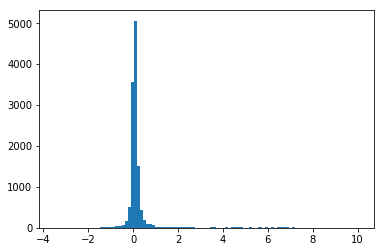

36 0.235997593832


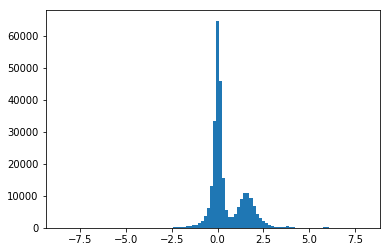

37 0.188514078748


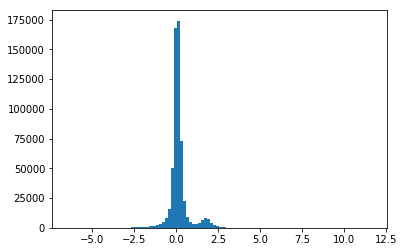

39 0.191236814067


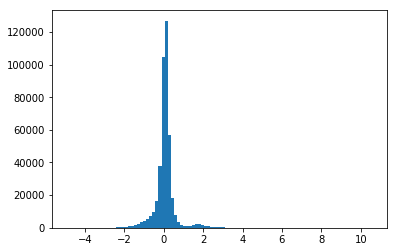

In [120]:
for state in ['19','36','37','39']:
    b=data['ratio']
    b=b[data['state']==state]
    aa=(np.abs(b-1)).map(lambda u: min(u,0.4)).mean()
    if 0:
        b=b[b>0.0]
        if state=='36':
            b=b[b<6]
        else:
            b=b[b<6]        
    print state, aa
    plt.hist(np.log(b),bins=100); plt.show()
    #plt.xlim([0,50])


In [44]:
a=data.sort_values('ratio')[['transactionyear','recordingdate','parcelid','documenttypeid'
                           ,'state','county','taxamount','totalassessedvalue','totalmarketvalue','taxvaluedollarcnt','saleprice','ratio']]

In [50]:
taxdata[taxdata['parcelid']==168193707]

assessmentyear   parcelid  totalassessedvalue     taxamount  \
398195             2017  168193707            786900.0  10239.129883   
6800820            2016  168193707               100.0  10239.129883   

         taxvaluedollarcnt  totalmarketvalue  
398195            786900.0          786900.0  
6800820              100.0             100.0

In [51]:
salesdata[salesdata['parcelid']==168193707] 

regionidcounty  transactionyear recordingdate   parcelid  \
1285907            3102             2017    2017-05-15  168193707   
1319865            3102             2016    2016-02-02  168193707   

         legalrecordingid createdate  documenttypeid  concurrentloanamount  \
1285907         571571173 2017-06-15           138.0                   NaN   
1319865         558343365 2016-12-28           138.0              136000.0   

         concurrentloancount  dataclasstypeid     ...       \
1285907                  NaN              5.0     ...        
1319865                  1.0              5.0     ...        

         inclusionruleidzestimate  derivedloanamount  derivedloancount  \
1285907                       0.0                NaN               NaN   
1319865                       1.0                NaN               NaN   

         sellertype  numseller  buyertype  numbuyer  state  county  \
1285907       41,41          2      41,41         2     37   37119   
1319865                      1      41,41         2     37   37119   

               tract  
1285907  37119002702  
1319865  37119002702  

[2 rows x 26 columns]

In [52]:
a[a.parcelid==168193707]

transactionyear recordingdate   parcelid  documenttypeid state  \
1319865             2016    2016-02-02  168193707           138.0    37   

        county     taxamount  totalassessedvalue  totalmarketvalue  \
1319865  37119  10239.129883               100.0             100.0   

         taxvaluedollarcnt  saleprice    ratio  
1319865              100.0  1012000.0  10120.0

In [62]:
#a.iloc[1000000:].tail(20)

## look at assesment value

In [121]:
data=newdata[newdata.inclusionruleidzestimate>0]
data=data[~data.totalassessedvalue.isnull()]
data['ratio']=data.saleprice/data.totalassessedvalue
print newdata.shape,data.shape

(8187370, 31) (2060735, 32)


In [122]:
data['state'].value_counts()

37    649516
06    569450
39    426608
36    275327
19    137012
na      2822
Name: state, dtype: int64

06


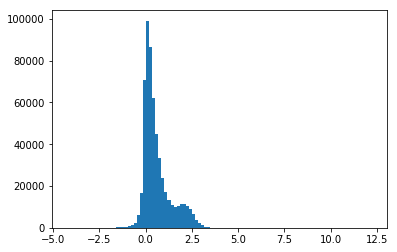

19


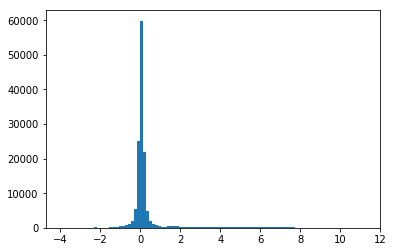

36


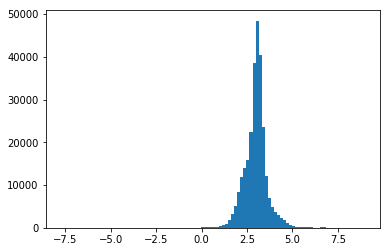

37


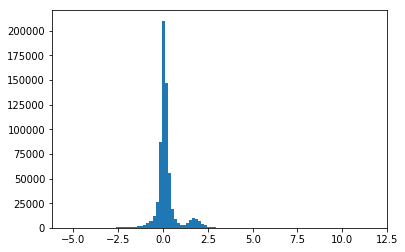

39


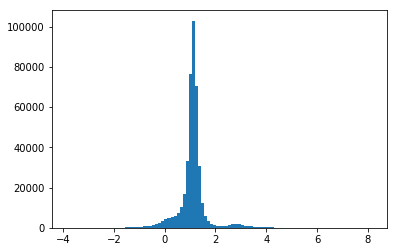

In [123]:
for state in ['06', '19','36','37','39']:
    b=data['ratio']
    b=b[data['state']==state]
    if 0:
        b=b[b>np.exp(-5)]
        if state=='36':
            b=b[b<80]
        else:
            b=b[b<6]        
    print state
    plt.hist(np.log(b),bins=100); plt.show()
    #plt.xlim([0,50])


# exclusive

## look at market value

In [124]:
data=newdata[newdata.inclusionruleidzestimate<1]
data=data[~data.totalmarketvalue.isnull()]
data=data[data.saleprice>0]
data['ratio']=data.saleprice/data.totalmarketvalue
print newdata.shape,data.shape

(8187370, 31) (1254605, 32)


In [125]:
data['state'].value_counts()

39    834252
37    304590
36    104896
na      5457
19      5410
Name: state, dtype: int64

In [126]:
(np.abs(data['ratio']-1)).map(lambda u: min(u,0.4)).mean()

0.27640037432667486

19 0.208099077643


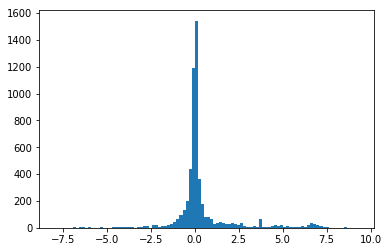

36 0.319756760764


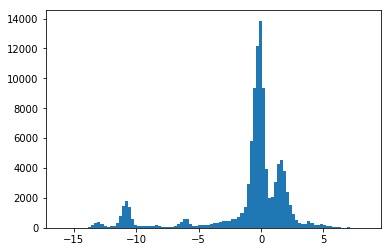

37 0.258219886227


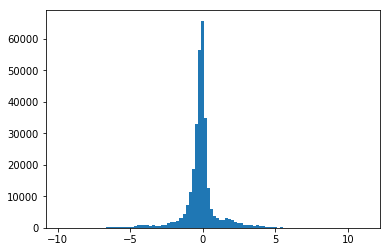

39 0.277652018897


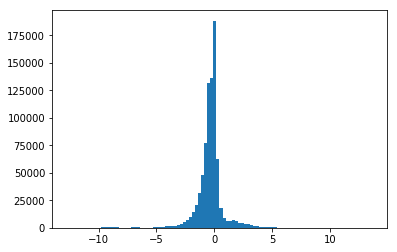

In [128]:
for state in ['19','36','37','39']:
    b=data['ratio']
    b=b[data['state']==state]
    aa=(np.abs(b-1)).map(lambda u: min(u,0.4)).mean()
    if 0:
        b=b[b>0.0]
        if state=='36':
            b=b[b<6]
        else:
            b=b[b<6]        
    print state, aa
    plt.hist(np.log(b),bins=100); plt.show()
    #plt.xlim([0,50])


In [101]:
a=data.sort_values('ratio')[['recordingdate','parcelid','documenttypeid'
                           ,'state','county','taxamount','totalassessedvalue',
                             'totalmarketvalue','taxvaluedollarcnt','saleprice','ratio',u'sellertype',u'buyertype']]

In [102]:
taxdata[taxdata['parcelid']==106871435]

assessmentyear   parcelid  totalassessedvalue    taxamount  \
8265117             2016  106871435            288810.0  1949.469971   
17491587            2015  106871435            288810.0  1949.469971   
26153969            2014  106871435            288810.0  1949.469971   
32959869            2013  106871435            326430.0  1909.619995   
40957368            2012  106871435            260660.0  1524.859985   

          taxvaluedollarcnt  totalmarketvalue  
8265117            288810.0          288810.0  
17491587           288810.0          288810.0  
26153969           288810.0          288810.0  
32959869           326430.0          326430.0  
40957368           260660.0          260660.0

In [111]:
salesdata[salesdata['parcelid']==116255571] .iloc[1]

regionidcounty                                    335
transactionyear                                  2010
recordingdate                     2010-10-06 00:00:00
parcelid                                    116255571
legalrecordingid                            451178212
createdate                        2016-01-29 00:00:00
documenttypeid                                    129
concurrentloanamount                              nan
concurrentloancount                               nan
dataclasstypeid                                     5
deedsloanamount                                195106
loanamount                                     195106
loancount                                           1
saleprice                                      191000
partialinteresttransferpercent                    nan
partialinteresttransfertypeid                     nan
inclusionruleidzestimate                            0
derivedloanamount                                 nan
derivedloancount            

In [108]:
a[a.parcelid==116255571]

recordingdate   parcelid  documenttypeid state county    taxamount  \
7552161    2010-10-06  116255571           129.0    39  39173  2908.709961   

         totalassessedvalue  totalmarketvalue  taxvaluedollarcnt  saleprice  \
7552161             56220.0          160600.0           160600.0   191000.0   

           ratio sellertype buyertype  
7552161  1.18929      41,41     41,41

In [105]:
a.iloc[:1000000].tail(20)

recordingdate   parcelid  documenttypeid state county    taxamount  \
1761886    2016-07-06  109063235           129.0    39  39113  3913.770020   
1509977    2008-06-25   96235038           138.0    37  37119          NaN   
2406228    2012-05-07  102691154           138.0    37  37019          NaN   
1499788    2008-11-03   96146101           133.0    37  37119          NaN   
5992611    2012-01-06  106871435           138.0    37  37133  1524.859985   
4425444    2016-09-09  113504157            63.0    39  39073  2035.959961   
7552161    2010-10-06  116255571           129.0    39  39173  2908.709961   
3716266    2012-11-14   85557826           138.0    39  39035  2667.699951   
2614012    2012-07-27  101017966            54.0    36  36085          NaN   
2614385    2012-07-06  101017966            54.0    36  36085          NaN   
6602987    2016-06-23  108284213           138.0    37  37179  1635.800049   
6333307    2015-06-05  112988655            63.0    39  39051  1590.880005   
7200027    2016-01-13   97245804            54.0    36  36047  5725.379883   
2912634    2009-12-30  114127629           129.0    39  39099  3385.459961   
4023331    2012-09-19  103007500           138.0    37  37027          NaN   
3682591    2013-09-13   85545799           129.0    39  39035  8836.219727   
3125921    2015-11-24   93414415           138.0    39  39049  2893.919922   
6646811    2010-05-21  108292554           133.0    37  37179          NaN   
6557767    2007-07-11  112045369           138.0    39  39017   652.239990   
6468207    2016-11-28  112098212           129.0    39  39017  4891.799805   

         totalassessedvalue  totalmarketvalue  taxvaluedollarcnt  saleprice  \
1761886             48560.0          138740.0           138740.0   165000.0   
1509977             59700.0           59700.0            59700.0    71000.0   
2406228                 NaN          504506.0           504506.0   600000.0   
1499788             82200.0           82200.0            82200.0    97759.0   
5992611            260660.0          260660.0           260660.0   310000.0   
4425444             52680.0          150510.0           150510.0   179000.0   
7552161             56220.0          160600.0           160600.0   191000.0   
3716266             28110.0           80300.0            80300.0    95500.0   
2614012             14220.0          237000.0           237000.0   281863.0   
2614385             14220.0          237000.0           237000.0   281863.0   
6602987            201750.0          201800.0           201800.0   240000.0   
6333307             35320.0          100900.0           100900.0   120000.0   
7200027             30190.0         1009000.0          1009000.0  1200000.0   
2912634             70640.0          201800.0           201800.0   240000.0   
4023331            100900.0          100900.0           100900.0   120000.0   
3682591            141270.0          403600.0           403600.0   480000.0   
3125921             43820.0          125200.0           125200.0   148900.0   
6646811            300130.0          300130.0           300130.0   356944.0   
6557767             12037.0           34390.0            34390.0    40900.0   
6468207             77990.0          222820.0           222820.0   265000.0   

            ratio sellertype buyertype  
1761886  1.189275         55     41,41  
1509977  1.189280         13     53,53  
2406228  1.189282      41,41        76  
1499788  1.189282      10,10        13  
5992611  1.189289         13     41,41  
4425444  1.189290      27,18     42,42  
7552161  1.189290      41,41     41,41  
3716266  1.189290         53        74  
2614012  1.189295      42,42        13  
2614385  1.189295      42,42        13  
6602987  1.189296      41,41     41,41  
6333307  1.189296      27,18        42  
7200027  1.189296         42        13  
2912634  1.189296      41,41     42,42  
4023331  1.189296      41,41     41,41  
3682591  1.189296      41,41     41,41  
3125921  1.1

## look at assesment value

In [129]:
data=newdata[newdata.inclusionruleidzestimate<1]
data=data[~data.totalassessedvalue.isnull()]
data['ratio']=data.saleprice/data.totalassessedvalue
print newdata.shape,data.shape

(8187370, 31) (4430924, 32)


In [130]:
data['state'].value_counts()

06    1684695
39    1585690
37     753617
36     236499
19     158272
na      12151
Name: state, dtype: int64

06


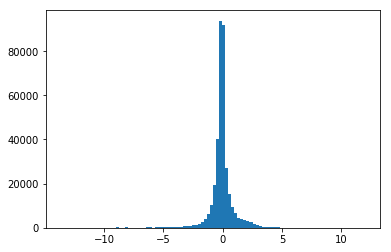

19


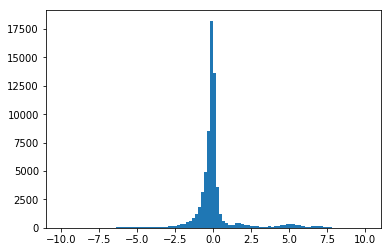

36


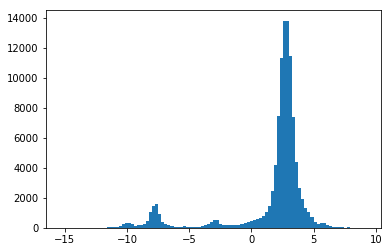

37


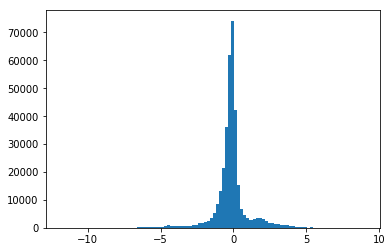

39


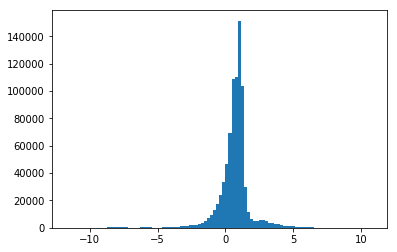

In [132]:
for state in ['06', '19','36','37','39']:
    b=data['ratio']
    b=b[data['state']==state]
    b=b[b>0.0]
    if 0:
        if state=='36':
            b=b[b<80]
        else:
            b=b[b<6]        
    print state
    plt.hist(np.log(b),bins=100); plt.show()
    #plt.xlim([0,50])


In [133]:
np.log(0.4)

-0.916290731874155

In [142]:
a=salesdata['parcelid'][salesdata['inclusionruleidzestimate']>0].value_counts()
a[a>1].shape

(420135,)

In [144]:
a=salesdata['parcelid'][salesdata['saleprice']>200].value_counts()
a[a>1].shape

(1180398,)